# **Text Summarization using Natural Language Processing**

### What is text summarization?

<p style='text-align: justify;'> 
The process of shortening a piece of text to represent only the most relevant information is known as automatic text summarization. This task usually involves reducing the volume of the original text while keeping crucial informational aspects and content meaning intact using some algorithms. Manual text summarization is a cumbersome process and can often be ridden with bias. Automating this process produces compressed text that is coherent and free from influence of the writer; it provides a strong incentive to do so for academic research and is becoming increasingly popular. There is a plethora of research papers out there for any particular topic. For anyone beginning with literature review by going through research papers or reading long news articles, automatic text summarization can prove to be very handy.
    </p>

### Why is text summarization so useful?

<p style='text-align: justify;'> 
Text summarising is useful for a variety of NLP tasks, including text classification, question answering, legal text summarization, news summarization, and headline generation. Furthermore, the development of summaries can be implemented into these systems as an intermediate step, reducing the document's length. For any automatic text summarizer, it is important to produce a coherent, concise and fluent summary, yet preserving the meaning of the original text.

For this goal, various machine learning approaches have been presented. The majority of these solutions model this topic as a classification problem that determines whether or not a sentence should be included in the summary. TextRank algorithms, Topic information, Latent Semantic Analysis (LSA), Sequence to Sequence models, Reinforcement Learning, and Adversarial processes are all capable of this task.
</p>

### Types of text summarization

#### Extractive text summarization:
<p style='text-align: justify;'> 
This technique relies on picking up or extracting the most important phrases from a piece of text. This approach first finds out sentence similarity and then assigns weight on the basis of its importance. The most important sentences are returned. Here, no new sentences are generated, only existing text in the document is used in summarization process. This is relatively easier. Common approaches include TextRank algorithm, TF-IDF, latent semantic analysis, etc.
</p>

#### Abstractive text summarization:
<p style='text-align: justify;'> 
In this technique, important parts of the document are paraphrased and shortened. New senetences are generated after the model understands the context of the document and produces its own semantics. This is a part of natural language generation and hence is more complex that the extractive approach. Deep learning produces good results in this case. Examples of common approaches include encoder-decoder models, transformer models, etc.
</p>



## Extractive text summarization using TF-IDF

Term frequency-Inverse Document frequency is a numerical technique that reflects how relevant a word is to the entire document. This metric that has two components, the **Term Frequency**, that represents the level of importance of a given word to all the other words in the document, and the **Inverse Document Frequency** is a measure of how unique or how common a word is in the whole document corpus. 

#### Term frequency

This is a count of how many times a particular term appears in the document. Using merely the term frequency will result in an inaccurate result, as a longer document will have a higher TF for a word 'X' than a shorter document. However, dividing the frequency by the number of words can normalize this.

        TF(w, d) = occurrences of word ‘w’ in the document ‘d’ / total number of words in the document ‘d’

#### Inverse document frequency

Document frequency is the number of times the word ‘w’ is in the set of documents. It is the number of documents that contain the word.

        DF(w) = number of times the word ‘w’ appears
        
Its inverse is more relevant, as common words will have a low IDF value while terms with a lesser occurrence gain higher precedence. Log values of this score makes it even useful. 

                        IDF(w) = log(N / (DF + 1))

Therefore,
    
                        TF-IDF(w, d) = TF(w, d) * log(N / (DF + 1))

#### Import libraries

In [ ]:
import re
import nltk
import math
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Clean the text

In [ ]:
def clean_text(file_name):
    with open(file_name, 'r') as file:
        text = file.read()
    article = sent_tokenize(text)
    sentences = []
    
    # removing special characters and extra whitespaces
    for sentence in article:
        sentence = re.sub('[\s+]', ' ', sentence)
        sentences.append(sentence)
    sentences.pop() 
    display = "".join(sentences)
    print('Initial Text: ')
    print(display)
    print('\n')
    return sentences

#### Calculate occurences of words in each sentence

In [ ]:
# counting the number of words in the document (sentence)
def cnt_words(sent):
    cnt = 0
    words = word_tokenize(sent)
    for word in words:
        cnt = cnt + 1
    return cnt
   
# getting data about each sentence (frequency of words) 
def cnt_in_sent(sentences):
    txt_data = []
    i = 0
    for sent in sentences:
        i = i + 1
        cnt = cnt_words(sent)
        temp = {'id' : i, 'word_cnt' : cnt}
        txt_data.append(temp)
    return txt_data

#### Create a list of frequencies for each word in all document

In [ ]:
# creating a dictionary of words for each document (sentence)
def freq_dict(sentences):
    i = 0
    freq_list = []
    for sent in sentences:
        i = i + 1
        freq_dict = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            if word in freq_dict:
                freq_dict[word] = freq_dict[word] + 1
            else:
                freq_dict[word] = 1
            temp = {'id' : i, 'freq_dict' : freq_dict}
        freq_list.append(temp)
    return freq_list

#### Calculate TF and IDF values

In [ ]:
# calculating the term frequency 
def calc_TF(text_data, freq_list):
    tf_scores = []
    for item in freq_list:
        ID = item['id']
        for k in item['freq_dict']:
            temp = {
                'id': item['id'],
                'tf_score': item['freq_dict'][k]/text_data[ID-1]['word_cnt'],
                'key': k
                }
            tf_scores.append(temp)
    return tf_scores

#calculating the inverse document frequency
def calc_IDF(text_data, freq_list):
    idf_scores =[]
    cnt = 0
    for item in freq_list:
        cnt = cnt + 1
        for k in item['freq_dict']:
            val = sum([k in it['freq_dict'] for it in freq_list])
            temp = {
                'id': cnt, 
                'idf_score': math.log(len(text_data)/(val+1)), 
                'key': k}
            idf_scores.append(temp)
    return idf_scores

#### Calculate TF-IDF values

In [ ]:
# calculating TFIDF value
def calc_TFIDF(tf_scores, idf_scores):
    tfidf_scores = []
    for j in idf_scores:
        for i in tf_scores:
            if j['key'] == i['key'] and j['id'] == i['id']:
                temp = {
                    'id': j['id'],
                    'tfidf_score': j['idf_score'] * i['tf_score'],
                    'key': j['key']
                    }
                tfidf_scores.append(temp)
    return tfidf_scores

#### Rank the documents based on TFIDF score

In [ ]:
# giving each sentence a score
def sent_scores(tfidf_scores, sentences, text_data):
    sent_data = []
    for txt in text_data:
        score = 0
        for i in range(0, len(tfidf_scores)):
            t_dict = tfidf_scores[i]
            if txt['id'] == t_dict['id']:
                score = score + t_dict['tfidf_score']
        temp = {
            'id': txt['id'],
            'score': score,
            'sentence': sentences[txt['id']-1]}
        sent_data.append(temp)
    return sent_data

#### Summarizing the text

In [ ]:
def summary(sent_data):
    cnt = 0
    summary = []
    for t_dict in sent_data:
        cnt  = cnt + t_dict['score']
    avg = cnt / len(sent_data)
    for sent in sent_data:
        if sent['score'] >= (avg):
            summary.append(sent['sentence'])
    summary = " ".join(summary)
    return summary

In [ ]:
sentences =  clean_text('test.txt')
text_data = cnt_in_sent(sentences)

freq_list = freq_dict(sentences)
tf_scores = calc_TF(text_data, freq_list)
idf_scores = calc_IDF(text_data, freq_list)

tfidf_scores = calc_TFIDF(tf_scores, idf_scores)

sent_data = sent_scores(tfidf_scores, sentences, text_data)
result = summary(sent_data)

print('Final Summary: ')
print(result)

Initial Text: 
Climate change raised the risk of deadly floods that swept through Western Europe in July, new research confirms.As people around the world continue burning fossil fuels and pumping out greenhouse gas emissions, the threat of similar disasters grows.Already, single-day rainfall events in the affected region are between 3 to 19 percent more intense than they would be without human-caused climate change.Global warming also makes extreme rainfall events like the one that triggered mid-July floods in Germany, Belgium, the Netherlands, and Luxembourg between 1.2 and nine times more likely to occur in the region.At least 220 people died in Germany and Belgium because of swollen rivers and floods that raged through entire towns, knocking homes off their foundations.The disaster was triggered by heavy rainfall that smashed records as the amount of water that might normally fall over a span of a couple of months instead came down in just two days.HUMAN ACTIVITY IS THE MAIN CULPRI

The TF-IDF model does pretty well on extractive summarizing. The TextRank algorithm and GloVe embeddings perform better in terms of coherence in the summarized text.

## Extractive text summarization using TextRank algorithm and GloVe embeddings

TextRank is an extractive and unsupervised text summarization technique. It is based on the same approach as PageRank algorithm to rank webpages; here sentences are evaluated instead of webpages and similarity between sentences are determined. 

The process is to concatenate text in the available articles. Then, the text is separated into individual sentences. We will next find the vector representation (word embeddings) for every sentence and stored the calculated similarity in a matrix. The sentence rank is calculate and the top-ranked sentences are picked as a part of summary.

In the following application, we have a set of articles about tennis matches and we attempt to summarize them. Hence, this is a single-domain-multiple-documents summarization task.

#### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re

#### Read the data

In [ ]:
df = pd.read_csv("tennis_articles.csv", encoding='utf-8')

df.head()

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP) — Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


The articles have a title and a whole document of text.

In [ ]:
df['article_text'][0]  # inspecting the text in the article

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [ ]:
df['article_text'][1]

"BASEL, Switzerland (AP) — Roger Federer advanced to the 14th Swiss Indoors final of his career by beating seventh-seeded Daniil Medvedev 6-1, 6-4 on Saturday. Seeking a ninth title at his hometown event, and a 99th overall, Federer will play 93th-ranked Marius Copil on Sunday. Federer dominated the 20th-ranked Medvedev and had his first match-point chance to break serve again at 5-1. He then dropped his serve to love, and let another match point slip in Medvedev's next service game by netting a backhand. He clinched on his fourth chance when Medvedev netted from the baseline. Copil upset expectations of a Federer final against Alexander Zverev in a 6-3, 6-7 (6), 6-4 win over the fifth-ranked German in the earlier semifinal. The Romanian aims for a first title after arriving at Basel without a career win over a top-10 opponent. Copil has two after also beating No. 6 Marin Cilic in the second round. Copil fired 26 aces past Zverev and never dropped serve, clinching after 2 1/2 hours wit

#### Split text into sentences

In [ ]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list


In [ ]:
sentences[:5]  # checking a few sentences

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.",
 "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match."]

#### GloVe word embeddings

GloVe word embeddings are vector representation of words. These word embeddings will be used to create vectors for the sentences. 

In [ ]:
## !wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-09-07 12:31:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-07 12:31:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-07 12:31:37--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
## !unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### Extract word embeddings

In [ ]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:
len(word_embeddings)

400000

#### Text preprocessing
In this step, we try to clean our text by removing punctuations and special characters. Following this, the text is converted into lowercase and get rid of stopwords. 

In [ ]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [ ]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

#### Creating vector representations of sentences
On generating clean sentences, we use the GloVe embeddings to create vectors for the sentences.

In [ ]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

We create vectors for the constituent words in a sentence and then we take the average of those vectors to get a combined vector for the sentence.

In [ ]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

#### Finding similarity between sentences
To find the similarity between the sentences, we create a similarity matrix using the cosine similarity approach. A n*n matrix (n is the number of sentences) with all zeroes is created and is then filled with the similarity scores of sentences.

In [ ]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

#### Applying the TextRank algorithm
The similarity matrix is converted into a graph. The nodes of the graph represent the sentences and edges represent similarity scores between the sentences. We next apply the PageRank algorithm to obtain the sentence rankings. 


In [ ]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

#### Summary extraction
Based on the text rankings, we select the top N sentences for summary generation.

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

“I was on a nice trajectorythen,” Reid recalled.“If I hadn’t got sick, I think I could have started pushing towards the second week at the slams and then who knows.” Duringa comeback attempt some five years later, Reid added Bernard Tomic and 2018 US Open Federer slayer John Millman to his list of career scalps.
Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.
So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
Speaking at the Swiss Indoors tournament where he will play in Sunday’s final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.
Currently in ninth place, Nishikori with a win could move to within 125 points of the cut for the eight-man event in London next month.
Exhau

## Abstractive Text Summarization using attention and encoder-decoder model

Dataset: https://www.kaggle.com/snap/amazon-fine-food-reviews

In [ ]:
import numpy as np
import pandas as pd 
import re
import requests
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/Reviews.csv.zip",nrows=100000)

In [ ]:
data.head()

In [ ]:
data.drop_duplicates(subset=['Text'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88421 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      88421 non-null  int64 
 1   ProductId               88421 non-null  object
 2   UserId                  88421 non-null  object
 3   ProfileName             88421 non-null  object
 4   HelpfulnessNumerator    88421 non-null  int64 
 5   HelpfulnessDenominator  88421 non-null  int64 
 6   Score                   88421 non-null  int64 
 7   Time                    88421 non-null  int64 
 8   Summary                 88421 non-null  object
 9   Text                    88421 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.4+ MB


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
#call the function
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [ ]:
cleaned_text[:5]  

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [ ]:
#call the function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [ ]:
cleaned_summary[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

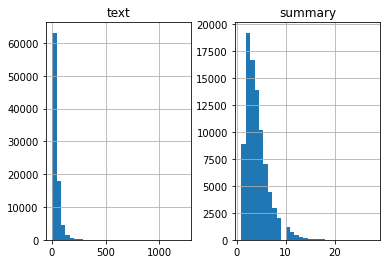

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=8):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.9424907471335922


In [ ]:
max_text_len=30
max_summary_len=8

In [ ]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.12339930151339
Total Coverage of rare words: 2.953684513790566


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

8440

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 78.12740675541863
Total Coverage of rare words: 5.3921899389571895


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(42453, 42453)

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])


In [ ]:
# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


NameError: ignored

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))


In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")